In [1]:
from pathlib import Path
from typing import List, Optional
from collections import defaultdict

import matplotlib.pyplot as plt
import tensorflow as tf

# Hack the system path a little bit so we can import ..scripts.utils
import sys
sys.path.append('..')

from scripts import utils

/Users/thomasliao/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/thomasliao/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/thomasliao/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/thomasliao/.local/lib/python3.7/site-packages/tensorflow/python/frame

In [2]:
OUTPUT_DIR = Path("../outputs")
DATA_DIR = Path("../data")

# Helper functions

In [3]:
# Path functions
def get_subdirs(d: Path) -> List[Path]:
    return [f for f in d.iterdir() if f.is_dir()]

def get_exp_paths(exp_name: str, *, most_recent=False) -> List[Path]:
    paths = list(DATA_DIR.glob(f"*{exp_name}*"))
    if most_recent:
        return [paths[0]]
    return paths

In [4]:
# Log functions

# https://github.com/franklinfrank/285project/blob/diff_ac/cs285/infrastructure/rl_trainer.py#L278-L301
def parse_tf_eventsfile(filename: str, *, tag='Eval_AverageReturn') -> List:
    eval_returns = []
    for e in tf.train.summary_iterator(filename):
        for v in e.summary.value:
            if v.tag == tag:
                eval_returns.append(v.simple_value)

    return eval_returns

# Business Code

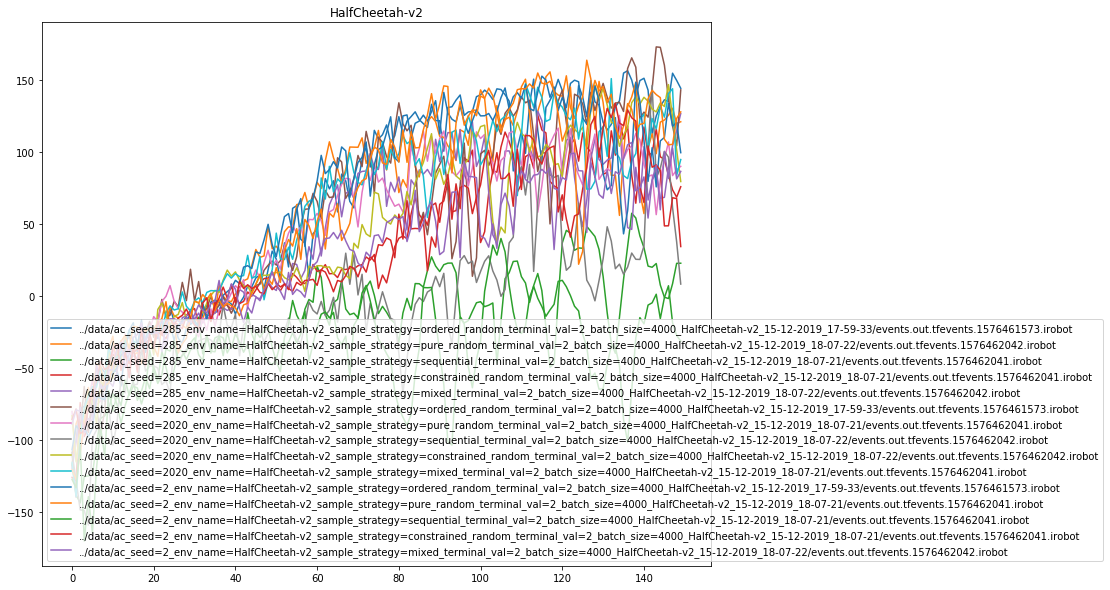

In [13]:
DEFAULT_FIGSIZE = (12,10)

exp_set_name = 'sample_sweep'

##

suite = defaultdict(list)
for exp_flags in (utils.get_exp_flags(exp_set_name)):
    run_folder = get_exp_paths(utils.get_exp_name(exp_flags), most_recent=True)[0]
    logfile = str(list(run_folder.iterdir())[0])
    suite[exp_flags['env_name']].append(logfile)
    
for env_name, exp_set in suite.items():
    plt.figure(figsize=DEFAULT_FIGSIZE)
    plt.title(env_name)
    for logfile in exp_set:
        y = parse_tf_eventsfile(logfile)
        plt.plot(y, label=logfile)
    plt.legend()

In [ ]:
plt.plot(parse_tf_events_file(logfile))

# Prototyping code

In [ ]:
curr_exp = Path('../data/ac_seed=285_env_name=HalfCheetah-v2_sample_strategy=ordered_random_terminal_val=2_batch_size=4000_HalfCheetah-v2_15-12-2019_17-59-33')


In [ ]:
[f for f in curr_exp.iterdir() if f.is_file()]

In [ ]:
# Copy paste above into the below
logfile = '../data/ac_seed=285_env_name=HalfCheetah-v2_sample_strategy=ordered_random_terminal_val=2_batch_size=4000_HalfCheetah-v2_15-12-2019_17-59-33/events.out.tfevents.1576461573.irobot'


In [ ]:
plt.plot(parse_tf_events_file(logfile))